In [1]:
using Pkg; Pkg.activate(".")
using Plots
using StatsBase

Activating environment at `~/Code/julia/stats_with_julia/Project.toml`


# Even Sum of Two Dice

What is the probability that the sum of two common dice is even?

In [2]:
N, faces = 10^6, 1:6

numSol = sum(iseven(i+j) for i in faces, j in faces) / length(faces)^2
mcEst = sum(iseven(rand(faces) + rand(faces)) for _ in 1:N) / N

println("Numerical solution = $numSol")
println("Monte Carlo estimate = $mcEst")

Numerical solution = 0.5
Monte Carlo estimate = 0.500077


# Matching Birthdays

What is the probability of finding two or more people who share the same birthday in a room with $N$ people?

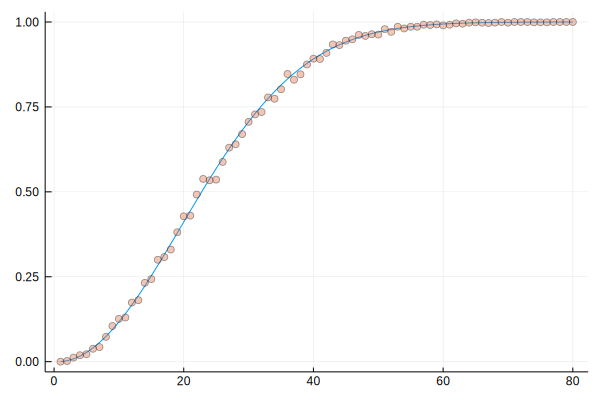

In [3]:
product(ns) = reduce(*, ns)
p_no_match(n) = product((365-n+1):365) / 365^n
p_match(n) = 1 - p_no_match(n)

domain = 1:80
plot(domain, p_match, legend=false)

N = 10^3
mc_p_match(n) = sum(maximum(counts(rand(1:365, Int(n)))) > 1 for _ in 1:N) / N

scatter!(domain, mc_p_match, alpha=0.4)